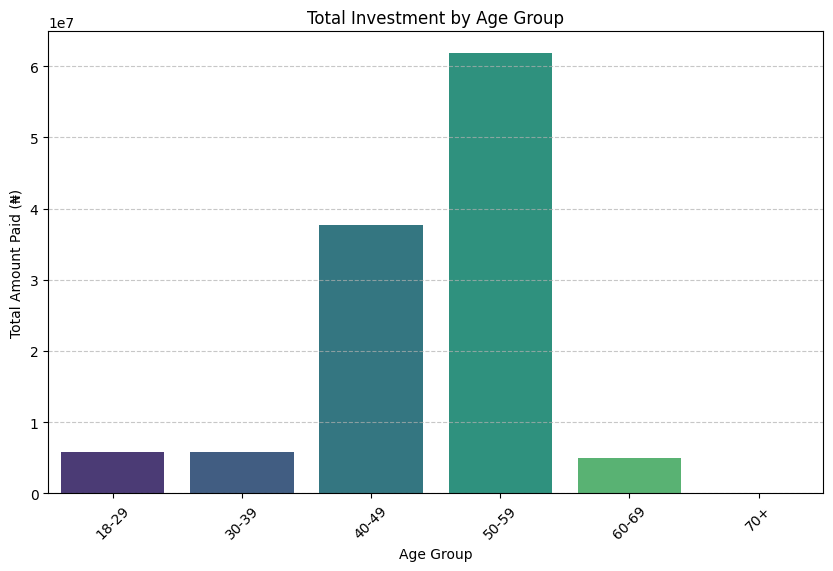

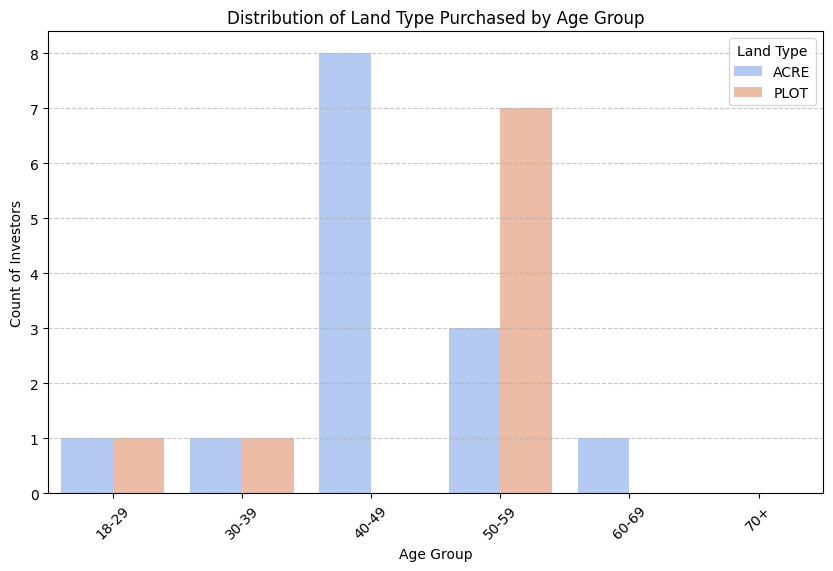

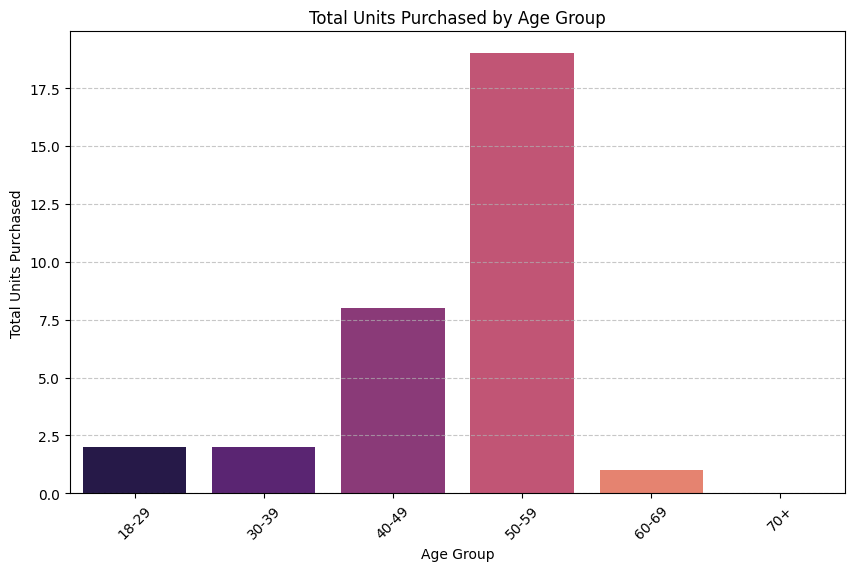

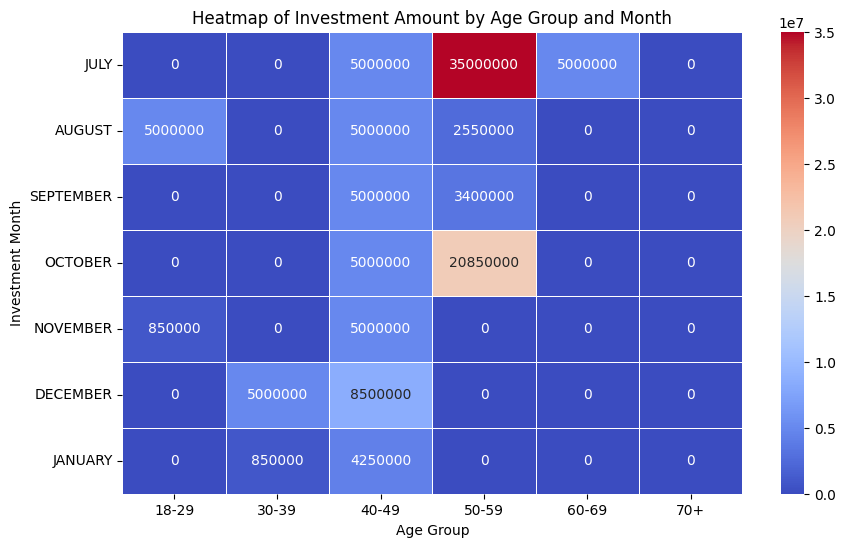

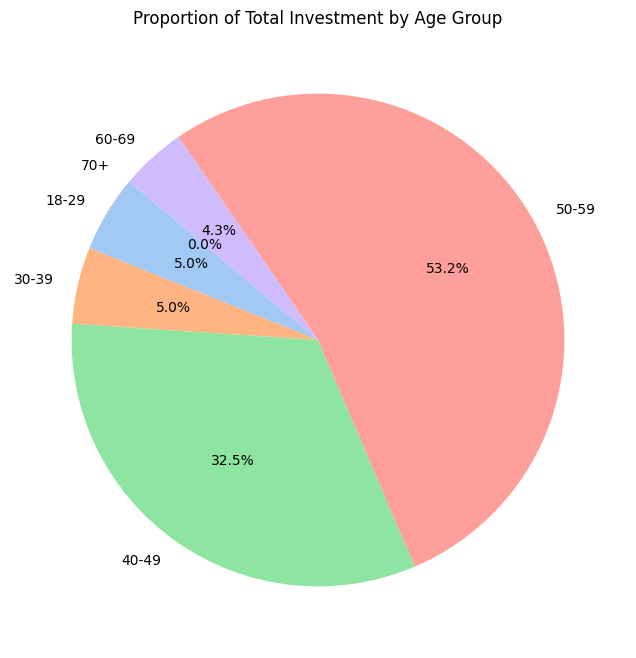

LAND       ACRE  PLOT  Total
AGE GROUP                   
18-29         1     1    2.0
30-39         1     1    2.0
40-49         8     0    8.0
50-59        11     8   19.0
60-69         1     0    1.0
70+           0     0    NaN
Total        22    10   32.0


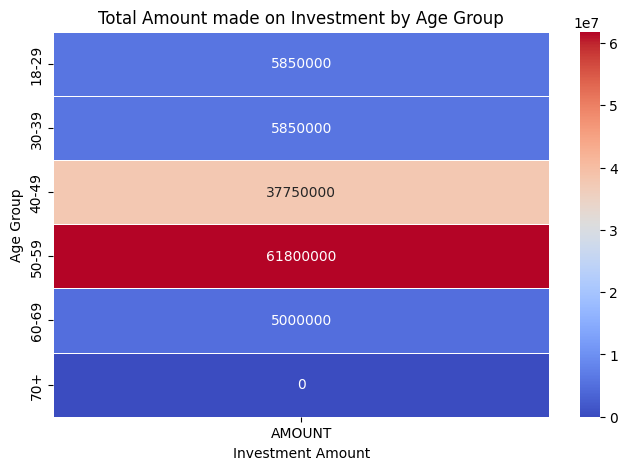

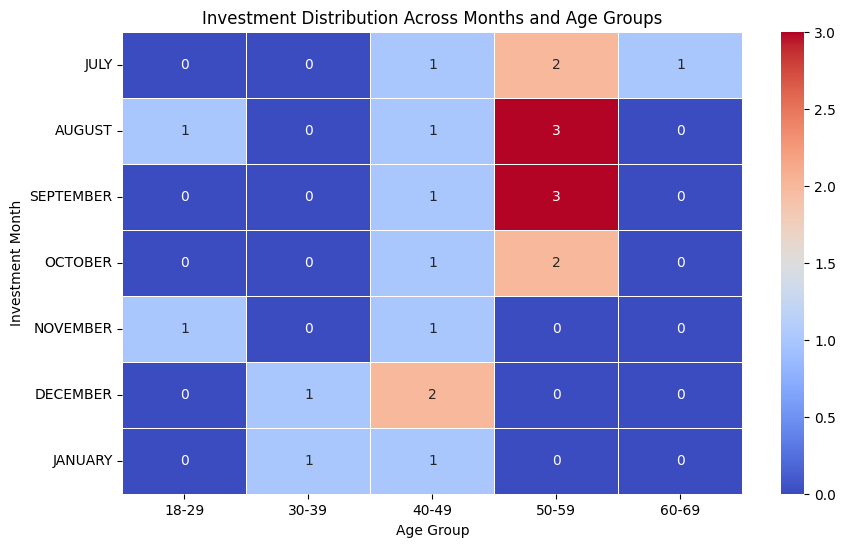

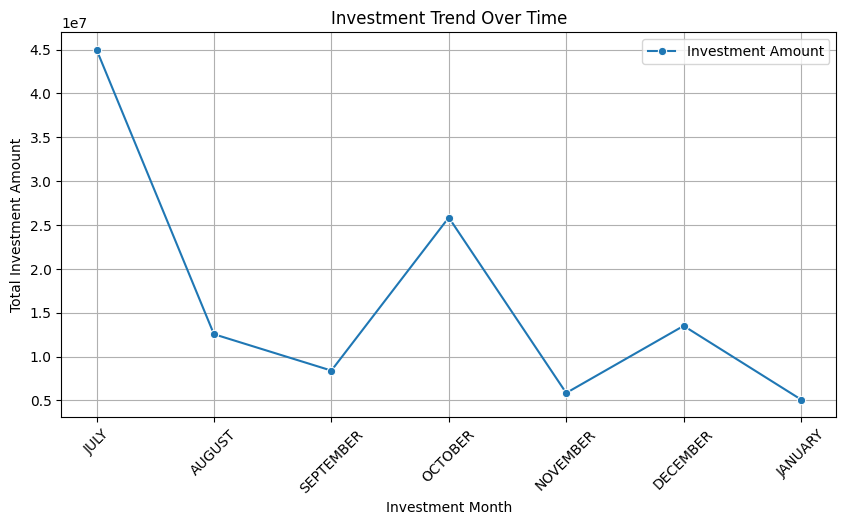

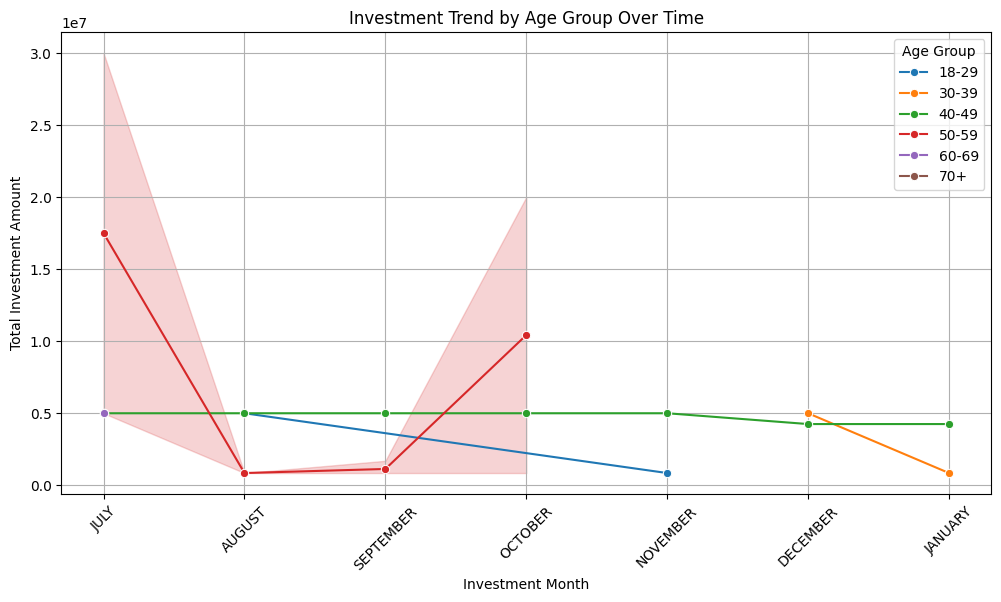

Unique Investment Months: ['JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER', 'JANUARY']
Categories (7, object): ['JULY' < 'AUGUST' < 'SEPTEMBER' < 'OCTOBER' < 'NOVEMBER' < 'DECEMBER' < 'JANUARY']


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Load the Excel file
df = pd.read_excel("processed_investment_data.xlsx")

# Select relevant columns
columns_to_keep = ['DOB', 'INVESTMENT YEAR', 'INVESTMENT MONTH', 'LAND', 'UNIT', 'AMOUNT']
df = df[columns_to_keep].copy()

# # Drop rows with missing DOB or AMOUNT
# df = df.dropna(subset=['DOB', 'AMOUNT'])

# Convert DOB to datetime format and calculate age
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
df['AGE'] = df['DOB'].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)

# Ensure investment months are ordered correctly
month_order = ['JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER', 'JANUARY']
df['INVESTMENT MONTH'] = pd.Categorical(df['INVESTMENT MONTH'], categories=month_order, ordered=True)

# Convert UNIT and AMOUNT to numeric
df['UNIT'] = pd.to_numeric(df['UNIT'], errors='coerce')
df['AMOUNT'] = pd.to_numeric(df['AMOUNT'], errors='coerce')

df = df.dropna()

# Define age groups
bins = [18, 30, 40, 50, 60, 70, 100]
labels = ["18-29", "30-39", "40-49", "50-59", "60-69", "70+"]
df["AGE GROUP"] = pd.cut(df["AGE"], bins=bins, labels=labels, right=False)

# Group by Age Group and sum Amount
age_amount_df = df.groupby("AGE GROUP")["AMOUNT"].sum().reset_index()

# Plot Age Group vs Total Amount Paid
plt.figure(figsize=(10, 6))
sns.barplot(x="AGE GROUP", y="AMOUNT", data=age_amount_df, palette="viridis", hue="AGE GROUP", legend=False)
plt.xlabel("Age Group")
plt.ylabel("Total Amount Paid (₦)")
plt.title("Total Investment by Age Group")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Count of land type (ACRE vs PLOT) by age group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="AGE GROUP", hue="LAND", palette="coolwarm")
plt.xlabel("Age Group")
plt.ylabel("Count of Investors")
plt.title("Distribution of Land Type Purchased by Age Group")
plt.xticks(rotation=45)
plt.legend(title="Land Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Aggregate total units bought per age group
age_units_df = df.groupby("AGE GROUP")["UNIT"].sum().reset_index()

# Plot Age Group vs Total Units Purchased
plt.figure(figsize=(10, 6))
sns.barplot(x="AGE GROUP", y="UNIT", data=age_units_df, palette="magma", hue="AGE GROUP", legend=False)
plt.xlabel("Age Group")
plt.ylabel("Total Units Purchased")
plt.title("Total Units Purchased by Age Group")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Pivot table for heatmap (Investment Month vs Age Group, showing total amount invested)
heatmap_data = df.pivot_table(index="INVESTMENT MONTH", columns="AGE GROUP", values="AMOUNT", aggfunc="sum")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.xlabel("Age Group")
plt.ylabel("Investment Month")
plt.title("Heatmap of Investment Amount by Age Group and Month")
plt.show()

# Pie chart for investment distribution by age group
plt.figure(figsize=(8, 8))
plt.pie(age_amount_df["AMOUNT"], labels=age_amount_df["AGE GROUP"], autopct="%1.1f%%", colors=sns.color_palette("pastel"), startangle=140)
plt.title("Proportion of Total Investment by Age Group")
plt.show()

# Cross-tabulation of Age Group vs. Land Type with total Units Purchased
crosstab_units = pd.crosstab(df["AGE GROUP"], df["LAND"], values=df["UNIT"], aggfunc="sum", margins=True, margins_name="Total")
print(crosstab_units)

# Heatmap: Investment Amount by Age Group
age_investment_pivot = df.pivot_table(index="AGE GROUP", values="AMOUNT", aggfunc="sum")
plt.figure(figsize=(8, 5))
sns.heatmap(age_investment_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("Total Amount made on Investment by Age Group")
plt.xlabel("Investment Amount")
plt.ylabel("Age Group")
plt.show()

# Cross-tabulation: Age Group vs. Investment Month
age_month_ct = pd.crosstab(df["INVESTMENT MONTH"], df["AGE GROUP"])
plt.figure(figsize=(10, 6))
sns.heatmap(age_month_ct, annot=True, cmap="coolwarm", linewidths=0.5, fmt="d")
plt.title("Investment Distribution Across Months and Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Investment Month")
plt.show()

# Trendline: Investment Trend Over Time
monthly_investment = df.groupby("INVESTMENT MONTH")["AMOUNT"].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_investment, x="INVESTMENT MONTH", y="AMOUNT", marker="o", label="Investment Amount")
plt.xticks(rotation=45)
plt.title("Investment Trend Over Time")
plt.xlabel("Investment Month")
plt.ylabel("Total Investment Amount")
plt.legend()
plt.grid(True)
plt.show()

# Trendline: Investment Trend by Age Group Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="INVESTMENT MONTH", y="AMOUNT", hue="AGE GROUP", marker="o")
plt.xticks(rotation=45)
plt.title("Investment Trend by Age Group Over Time")
plt.xlabel("Investment Month")
plt.ylabel("Total Investment Amount")
plt.legend(title="Age Group")
plt.grid(True)
plt.show()

# Check if all months are present
print("Unique Investment Months:", df["INVESTMENT MONTH"].unique())
